# **Create and compile a Sequential model for your DNN/LSTM**


In [2]:
import tensorflow as tf  # Import TensorFlow
from tensorflow.keras.models import Sequential  # Import Sequential model for building DNNs
from tensorflow.keras.layers import Dense, Activation, Dropout  # Import layers for building DNNs
from tensorflow.keras.optimizers import Adam  # Import optimizer for training DNNs
from tensorflow.keras.utils import to_categorical  # Import utility for one-hot encoding
from tensorflow.keras.callbacks import EarlyStopping  # Import callback for early stopping during training
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [ ]:
import numpy as np

def load_data(filename):
    '''
    General case to load any data from filename
    Output tuple:
        xtr, ytr : Data and labels for training
        xva, yva : Data and labels for validation
        xte, yte : Data and labels for test
    '''
    loaded = np.load(filename)
    xtr = loaded['xtr']
    ytr = loaded['ytr']
    xva = loaded['xva']
    yva = loaded['yva']
    xte = loaded['xte']
    yte = loaded['yte']
    return (xtr, ytr, xva, yva, xte, yte)

# Load .npz file
xtr, ytr, xva, yva, xte, yte = load_data("./Codebook.npz")

In [ ]:
# Define Keras Model

x_train, y_train = xtr, ytr
x_val, y_val = xva, yva
x_test, y_test = xte, yte

In [ ]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.utils import class_weight

# Calculate class weights
ytr_list = ytr.tolist()
ytr_tuple = tuple(ytr_list)
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(ytr_list),  y=ytr_tuple)

# Convert the class weights to a dictionary for use in model training
#class_weights_dict = dict(enumerate(class_weights))

# Create the model
model = Sequential()

# Add input layer with appropriate input shape
model.add(Dense(units=512, activation='relu', input_shape=(64,)))
model.add(BatchNormalization())

# Add hidden layers with dropout
model.add(Dense(units=256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units=256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Add output layer with appropriate activation function and number of units
model.add(Dense(units=64, activation='softmax'))

# Compile the model with class weights
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()

# Define early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, restore_best_weights=True)

# Train the model
model.fit(xtr, ytr, validation_data=(xva, yva), batch_size=512, epochs=100, callbacks=[early_stopping])

# Evaluate the model
score = model.evaluate(xte, yte, batch_size=512)

# Print test accuracy
print(score)
print('Test accuracy:', score[1])


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

y_pred = model.predict(xte)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(yte, axis=1)

# Compute F1 score, precision, recall
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')

print("F1 score:", f1)
print("Precision:", precision)
print("Recall:", recall)


2000/2000 [==============================] - 6s 3ms/step
F1 score: 0.9786925098745042
Precision: 0.979961643838983
Recall: 0.983859375


In [ ]:
model.save('./model_F1=98.16')


# **Converting .mp3 to .wav**

In [ ]:
!pip install pydub
!pip install SpeechRecognition
from pydub import AudioSegment
import matplotlib.pyplot as plt
from scipy.io import wavfile
from tempfile import mktemp
mp3_audio = AudioSegment.from_file('./Morse Code Sample 1 - 10 WPM Audio.mp3', format="mp3") # read mp3
wname = mktemp('.wav') # use temporary file
mp3_audio.export(wname, format="wav") # convert to wav
FS, data = wavfile.read(wname) # read wav file
# import required modules
from os import path
from pydub import AudioSegment
# assign files
input_file = "./Morse Code Sample 1 - 10 WPM Audio.mp3"
output_file = "./result.wav"
# convert mp3 file to wav file
sound = AudioSegment.from_mp3(input_file)
sound.export(output_file, format="wav")

# **Convert the .wav file into text form.**

In [ ]:
from pydub import AudioSegment
import matplotlib.pyplot as plt
from scipy.io import wavfile
from tempfile import mktemp
mp3_audio = AudioSegment.from_file('./Morse Code Sample 1 - 10 WPM Audio.mp3', format="mp3") # read mp3
wname = mktemp('.wav') # use temporary file
mp3_audio.export(wname, format="wav") # convert to wav
FS, data = wavfile.read(wname) # read wav file

In [ ]:
np.shape(data)

(4024970,)

In [ ]:
FS

8000

In [ ]:
# Normalize the array by 32768.0
data_normalized = data / 32768.0

4024970
[0.00231934 0.00311279 0.00369263 0.00396729 0.00396729 0.00384521
 0.00366211 0.00354004 0.00350952 0.00360107 0.00369263 0.00378418
 0.00378418 0.00375366 0.00366211 0.00363159 0.00360107 0.00363159
 0.00369263 0.00372314 0.00375366 0.00372314 0.00369263 0.00366211
 0.00363159 0.00366211 0.00369263 0.00372314 0.00372314 0.00372314
 0.00369263 0.00366211 0.00366211 0.00366211 0.00366211 0.00369263
 0.00372314 0.00369263 0.00369263 0.00366211 0.00366211 0.00366211
 0.00366211 0.00369263 0.00369263 0.00369263 0.00369263 0.00366211
 0.00366211 0.00366211 0.00366211 0.00369263 0.00369263 0.00369263
 0.00369263 0.00369263 0.00366211 0.00366211 0.00366211 0.00369263
 0.00369263 0.00369263 0.00369263 0.00369263 0.00366211 0.00366211
 0.00366211 0.00369263 0.00369263 0.00369263 0.00369263 0.00369263
 0.00366211 0.00366211 0.00366211 0.00369263 0.00369263 0.00369263
 0.00369263 0.00369263 0.00366211 0.00366211 0.00366211 0.00369263
 0.00369263 0.00369263 0.00369263 0.00369263 0.0036621

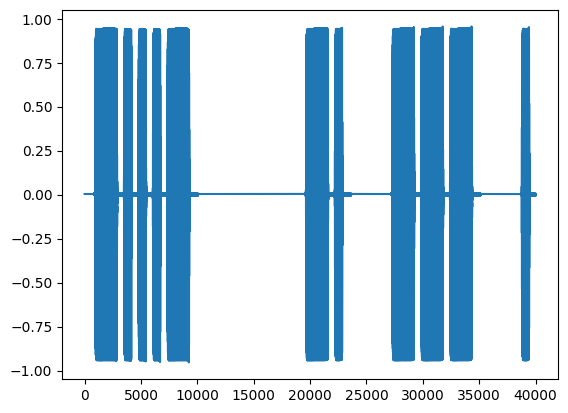

In [ ]:
print(len(data_normalized))
print(data_normalized[:100])
plt.plot(data_normalized[5000:45000])

In [ ]:
# visual rep - >  [[dash, dot, dot, dot, dash],[] , []]   -> [make into 64 vector using random number generator]
print(data_normalized[:100])

[0.00231934 0.00311279 0.00369263 0.00396729 0.00396729 0.00384521
 0.00366211 0.00354004 0.00350952 0.00360107 0.00369263 0.00378418
 0.00378418 0.00375366 0.00366211 0.00363159 0.00360107 0.00363159
 0.00369263 0.00372314 0.00375366 0.00372314 0.00369263 0.00366211
 0.00363159 0.00366211 0.00369263 0.00372314 0.00372314 0.00372314
 0.00369263 0.00366211 0.00366211 0.00366211 0.00366211 0.00369263
 0.00372314 0.00369263 0.00369263 0.00366211 0.00366211 0.00366211
 0.00366211 0.00369263 0.00369263 0.00369263 0.00369263 0.00366211
 0.00366211 0.00366211 0.00366211 0.00369263 0.00369263 0.00369263
 0.00369263 0.00369263 0.00366211 0.00366211 0.00366211 0.00369263
 0.00369263 0.00369263 0.00369263 0.00369263 0.00366211 0.00366211
 0.00366211 0.00369263 0.00369263 0.00369263 0.00369263 0.00369263
 0.00366211 0.00366211 0.00366211 0.00369263 0.00369263 0.00369263
 0.00369263 0.00369263 0.00366211 0.00366211 0.00366211 0.00369263
 0.00369263 0.00369263 0.00369263 0.00369263 0.00366211 0.0036

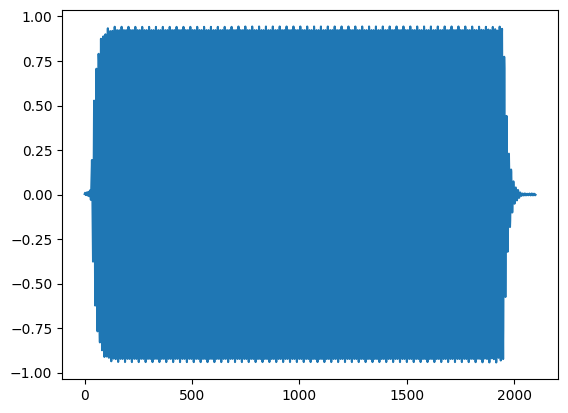

In [ ]:
plt.plot(data_normalized[5900:8000]) #data is an analog signal and needs to be digitized

In [ ]:
nor = []
#make data between 0 and 1
for entry in data_normalized:
  if entry > 0.75:
    nor.append(1)
  elif entry < -0.75:
    nor.append(1)
  else:
    nor.append(0)

In [ ]:
print(nor[:100])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


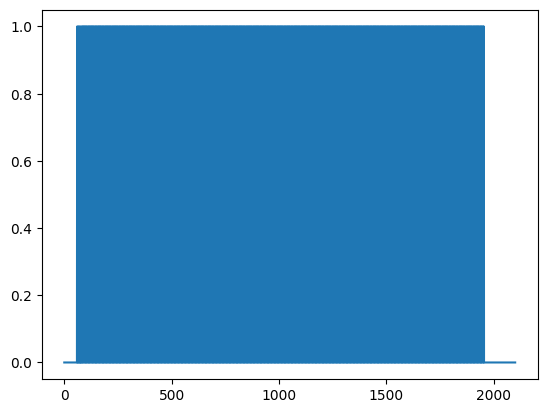

In [ ]:
plt.plot(nor[5900:8000])

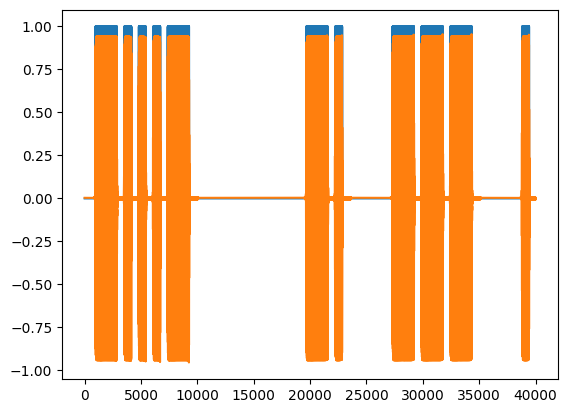

In [ ]:
# This converts all the range into strictly -1, 0 , 1
plt.plot(nor[5000:45000])
plt.plot(data_normalized[5000:45000])

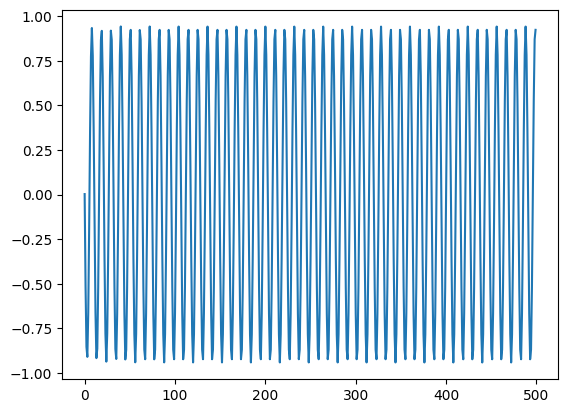

In [ ]:
plt.plot(data_normalized[6000:6500])

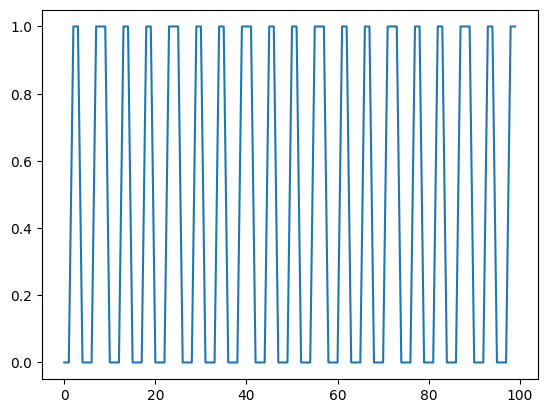

In [ ]:
plt.plot(nor[6000:6100]) #now we see that there are holes in our signal that need to be removed

In [ ]:

def counter(integer_list, key):
  '''function that returns list of number of consecutive times we see
  key in integer list'''
  num_consecutive_key = 0
  key_segments = [] #list will hold
  for i in range(len(integer_list)):
      if integer_list[i] == key:
          num_consecutive_key += 1
      else: # we are not seeing key
          if num_consecutive_key > 0:
              key_segments.append(num_consecutive_key) #if loop ends before hitting this, we have problem
          num_consecutive_key = 0 #reset counter

  if num_consecutive_key > 0: # if num_consecutive_key > 0, then we have a sequence but it was not added
      key_segments.append(num_consecutive_key)
      num_consecutive_key = 0
  return key_segments

In [ ]:
counter(nor[6000:6100],1)

[2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2]

In [ ]:
def remove_holes_in_normalized_data(integer_list):
  ''' we have a bunch of holes in signal, so this function will normalize the signal into a pure pulse'''
  num_consecutive_zeros = 0
  zero_segments = []

  for i in range(len(integer_list)):
      if integer_list[i] == 0:
          num_consecutive_zeros += 1 #get consecutive 0s
      else:
          if num_consecutive_zeros > 0:
              zero_segments.append(num_consecutive_zeros)
              if num_consecutive_zeros < 10: # pulse is basically over if signal has more than 10 consecutive 0s
                  for j in range(num_consecutive_zeros):
                      integer_list[i-j-1] = 1 #go back and replace 0s with 1s
          num_consecutive_zeros = 0

  if num_consecutive_zeros > 0:
      zero_segments.append(num_consecutive_zeros)
      if num_consecutive_zeros < 10:
          for j in range(num_consecutive_zeros):
              integer_list[-j-1] = 1

  return integer_list


In [ ]:
print(remove_holes_in_normalized_data(nor[6000:6100]))
print(len(remove_holes_in_normalized_data(nor[6000:6100])))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
100


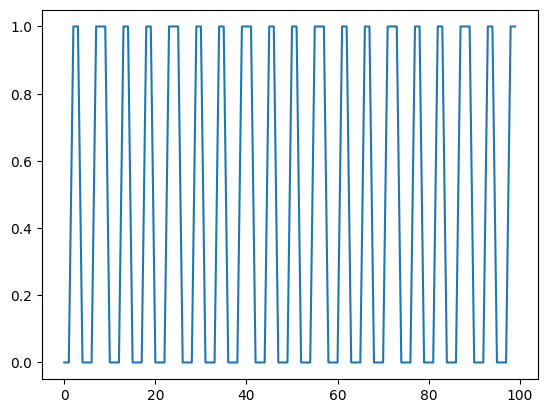

In [ ]:
plt.plot(nor[6000:6100]) #holey signal

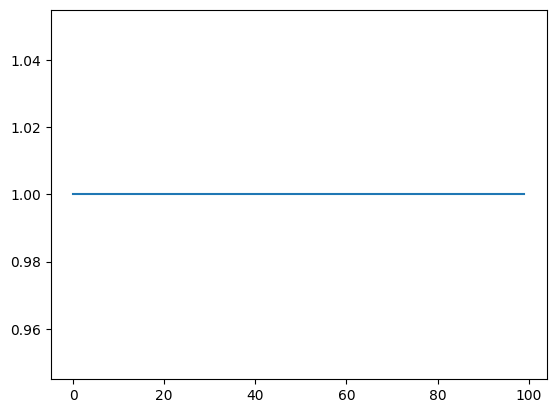

In [ ]:
plt.plot(remove_holes_in_normalized_data(nor[6000:6100])) #corrected signal

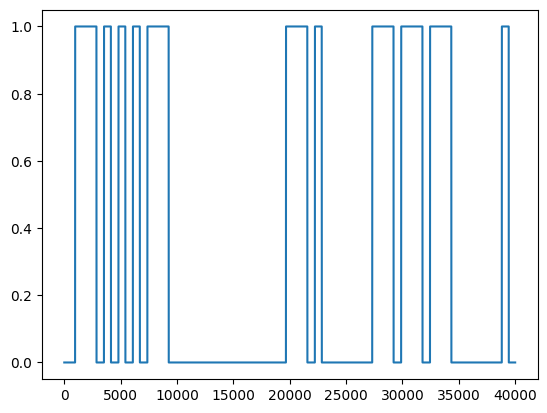

In [ ]:
removed = remove_holes_in_normalized_data(nor[5000:45000])
plt.plot(removed) #now we have a clean graph and can tell dots from dashes

In [ ]:
removed = remove_holes_in_normalized_data(nor)
number_of_ones = counter(removed,1)
number_of_zero = counter(removed,0)
print(number_of_ones)
print(number_of_zero)

[1894, 615, 610, 615, 1889, 1895, 610, 1890, 1889, 1889, 614, 1889, 1889, 609, 1894, 1889, 1889, 1894, 1894, 1890, 1890, 1889, 1889, 610, 1890, 1889, 609, 1894, 1889, 609, 1890, 1894, 1894, 609, 609, 610, 1894, 1889, 614, 1894, 609, 609, 1890, 1890, 609, 609, 609, 614, 614, 610, 609, 1889, 609, 609, 1894, 614, 1889, 1889, 1890, 1889, 1894, 1889, 614, 1894, 1889, 1889, 610, 614, 614, 1890, 610, 1890, 1890, 1895, 609, 609, 614, 609, 609, 1890, 614, 609, 614, 1889, 1889, 1889, 1889, 1894, 1895, 1890, 1895, 610, 609, 1889, 1894, 1889, 1889, 1889, 1894, 1894, 1890, 1889, 1889, 614, 1894, 615, 610, 610, 1895, 610, 1894, 1895, 610, 610, 1895, 1895, 1889, 609, 609, 610, 610, 609, 609, 609, 1894, 1889, 1889, 1894, 615, 1889, 609, 609, 614, 1895, 610, 609, 1889, 614, 1894, 1889, 1889, 610, 1894, 615, 1889, 609, 609, 609, 1890, 609, 1894, 614, 615, 1890, 610, 615, 1889, 609, 1889, 1894, 610, 615, 609, 609, 614, 610, 609, 609, 614, 1889, 1889, 1889, 610, 614, 1890, 610, 1890, 615, 610, 609, 609, 6

In [ ]:
minimum_ones = min(number_of_ones)
minimum_zero = min(number_of_zero)
ratio_1 = [round(i/minimum_ones) for i in number_of_ones] #we write the data in terms of the smallest pulse rounded to nearest int
ratio_0 = [round(i/minimum_zero) for i in number_of_zero]

print("one :: ",ratio_1)
print("zero :: ", ratio_0)
print("zero :: ", minimum_zero,list(set(ratio_0)), list(set(ratio_0))[1]*minimum_zero) #we can see that 1 is a dot and 3 is a dash

one ::  [3, 1, 1, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 1, 3, 3, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 3, 3, 3, 1, 1, 3, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 1, 3, 1, 1

In [ ]:
def word_sep(integer_list):
  ''' function to give indices where characters start and end from an analog signal'''
  # Setting up break points
  num_consecutive_zeros = 0
  chars= []
  break_points = []
  for i in range(len(integer_list)):
    if integer_list[i] == 0:
      num_consecutive_zeros += 1
      if num_consecutive_zeros >= 10000: #we know now that we have a character
        break_points.append(i) #add index and reset counter

        num_consecutive_zeros = 0
    else:
      num_consecutive_zeros = 0

  for i in range(len(break_points)):
    if i + 1 != len(break_points):#makes sure we don't get index error
      sub = break_points[i+1]-break_points[i]
      if sub != 10000: #this is so that we don't get empty spaces if we come across a long chain of 0s
        chars.append(integer_list[break_points[i] : break_points[i+1] ])
  print(break_points[:15])
  print(len(chars),len(chars[0]))
  return chars
words = word_sep(nor)

[24259, 59544, 97427, 133997, 152701, 187945, 207896, 253389, 326925, 394190, 426915, 467283, 498766, 517470, 559966]
85 35285


In [ ]:
def character_sep(integer_list):
  ''' function to give indices where characters start and end from an analog signal'''
  removed = remove_holes_in_normalized_data(integer_list)
  number_of_ones = counter(removed,1)
  number_of_zero = counter(removed,0)
  sorted_zeros = sorted(list(set(number_of_zero)))
  minimum = sorted_zeros[0]
  second_min = 0 #find second min so that we know how long to go till we end character
  for elem in sorted_zeros:
    if elem > (2*minimum):
      second_min = elem
      break
  print(sorted_zeros)
  print("second min :: ", second_min)

  num_consecutive_zeros = 0
  chars = []
  # Setting up break points
  break_points = []
  for i in range(len(integer_list)):
    if integer_list[i] == 0:
      num_consecutive_zeros += 1
      if num_consecutive_zeros >= second_min: #we know now that we have a character
        break_points.append(i) #add index and reset counter
        num_consecutive_zeros = 0
    else:
      num_consecutive_zeros = 0

  for i in range(len(break_points)):
    if i + 1 != len(break_points):#makes sure we don't get index error
      sub = break_points[i+1]-break_points[i]
      if sub != second_min: #this is so that we don't get empty spaces if we come across a long chain of 0s
        chars.append(integer_list[break_points[i] : break_points[i+1] ])
      else:
        temp = []
        chars.append(temp)
  #print(break_points[:10])
  #print(len(chars),len(chars[0]))
  return chars


In [ ]:
characters = character_sep(nor)

[666, 670, 671, 676, 4473, 4474, 4478, 4479, 5960, 10404, 10405, 10409, 10410, 16334, 28161]
second min ::  4473


In [ ]:
def string_decoder(chars):
  #take our chain of pulses and make them into morse
  decoded = []
  abs_min_dot_size = 999999
  print("# of characters ::: ",len(chars))
  for characters in chars:
    if characters == []:
      temp = []
      decoded.append(temp)
      continue
    number_of_ones = counter(characters,1)
    number_of_zero = counter(characters,0)
    minimum_ones = min(number_of_ones)
    minimum_zero = min(number_of_zero)

    #find smallest pulse length
    if minimum_ones < abs_min_dot_size:
      abs_min_dot_size = minimum_ones

    if minimum_ones > (2*abs_min_dot_size):
      minimum_ones = abs_min_dot_size

    ratio_1 = [round(i/minimum_ones) for i in number_of_ones]
    ratio_0 = [round(i/minimum_zero) for i in number_of_zero]


    string = []
    for entry in ratio_1:
      if entry == 1: #dots are typically 1 long with respect to smallest pulse
        string.append("dot")
      elif entry == 3:
        string.append("dash") #dashes are ~3 times as long as dots, but always round to 3
      else:
        string.append("ERROR")
        break
    decoded.append(string)
  #print("The absolute smalled dot length is ::: ",abs_min_dot_size)
  return decoded



In [ ]:
decoded = string_decoder(characters)

# of characters :::  459


In [ ]:
print(decoded)


[['dash', 'dot', 'dot', 'dot', 'dash'], [], ['dash', 'dot'], ['dash', 'dash', 'dash'], ['dot', 'dash', 'dash'], [], ['dot', 'dash', 'dash', 'dash', 'dash'], ['dash', 'dash', 'dash', 'dash', 'dash'], [], ['dot', 'dash', 'dash'], ['dot', 'dash', 'dash', 'dot'], ['dash', 'dash'], [], ['dash', 'dot', 'dot', 'dot', 'dash'], [], ['dash'], ['dot'], ['dash', 'dot', 'dot', 'dash'], ['dash'], [], ['dot', 'dot'], ['dot', 'dot', 'dot'], [], ['dot', 'dot', 'dash', 'dot'], ['dot', 'dash', 'dot'], ['dash', 'dash', 'dash'], ['dash', 'dash'], [], ['dash', 'dot'], ['dash', 'dash', 'dash'], ['dot', 'dot', 'dot', 'dash'], ['dot'], ['dash', 'dash'], ['dash', 'dot', 'dot', 'dot'], ['dot'], ['dot', 'dash', 'dot'], [], ['dot', 'dot', 'dash', 'dash', 'dash'], ['dash', 'dash', 'dash', 'dash', 'dash'], ['dot', 'dot', 'dash', 'dash', 'dash'], ['dash', 'dash', 'dash', 'dash', 'dash'], [], ['dash', 'dash', 'dot', 'dash'], ['dot', 'dot', 'dot'], ['dash'], [], ['dot', 'dash', 'dash', 'dot'], ['dot', 'dash'], ['dash',

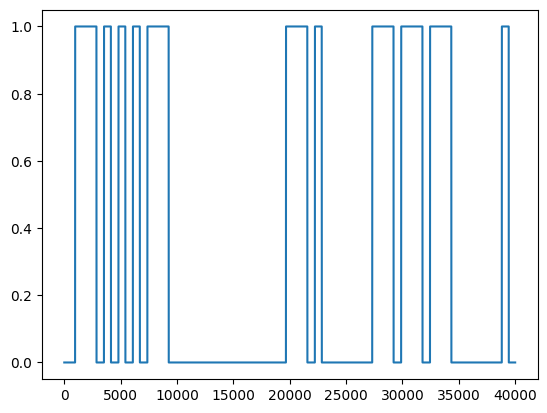

In [ ]:
removed = remove_holes_in_normalized_data(nor[5000:45000])
plt.plot(removed)

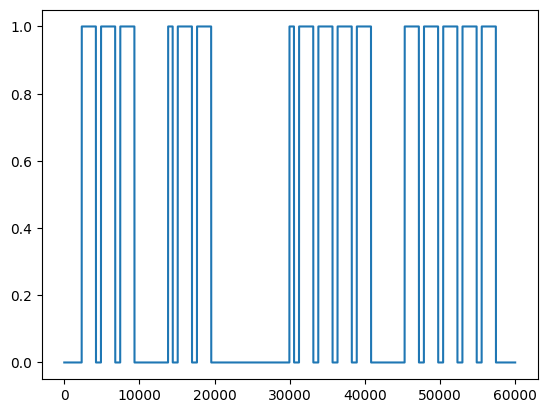

In [ ]:
removed = remove_holes_in_normalized_data(nor[30000:90000])
plt.plot(removed)

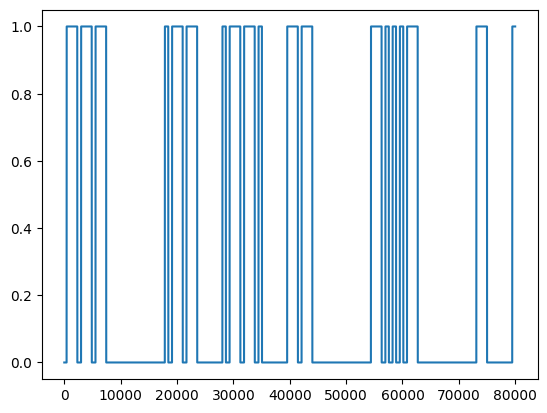

In [ ]:
removed = remove_holes_in_normalized_data(nor[80000:160000])
plt.plot(removed)

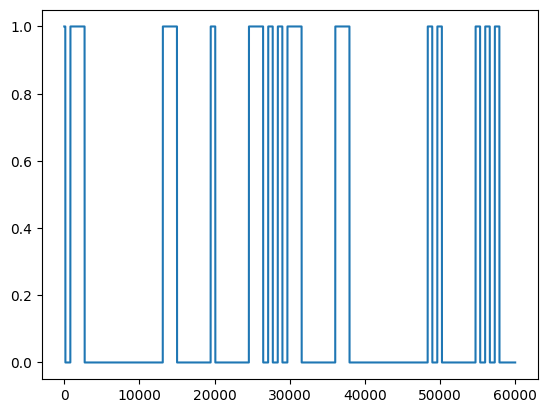

In [ ]:
removed = remove_holes_in_normalized_data(nor[140000:200000])
plt.plot(removed)

In [ ]:
def random_num_gen(mean, sigma, amount):
  # Generate 10 values sampled from a normal distribution with the specified mean and standard deviation
  samples = np.random.lognormal(mean, sigma, amount)
  return samples

def space_inserter(decoded):
  #for our vector we need to put spaces in between the pulses
  space_inserted = []
  for decode in decoded:
    if len(decode) > 0:
      new_decoded = [decode[0]]
      for i in range(1, len(decode)): #we dont want to put space before 1st and after last
          new_decoded.append("space")
          new_decoded.append(decode[i])
      space_inserted.append(new_decoded)
      new_decoded = []
    else:
      temp = []
      space_inserted.append(temp)
  return space_inserted


In [ ]:
spaced = space_inserter(decoded)
assert len(decoded) == len(spaced)
print(spaced)

[['dash', 'space', 'dot', 'space', 'dot', 'space', 'dot', 'space', 'dash'], [], ['dash', 'space', 'dot'], ['dash', 'space', 'dash', 'space', 'dash'], ['dot', 'space', 'dash', 'space', 'dash'], [], ['dot', 'space', 'dash', 'space', 'dash', 'space', 'dash', 'space', 'dash'], ['dash', 'space', 'dash', 'space', 'dash', 'space', 'dash', 'space', 'dash'], [], ['dot', 'space', 'dash', 'space', 'dash'], ['dot', 'space', 'dash', 'space', 'dash', 'space', 'dot'], ['dash', 'space', 'dash'], [], ['dash', 'space', 'dot', 'space', 'dot', 'space', 'dot', 'space', 'dash'], [], ['dash'], ['dot'], ['dash', 'space', 'dot', 'space', 'dot', 'space', 'dash'], ['dash'], [], ['dot', 'space', 'dot'], ['dot', 'space', 'dot', 'space', 'dot'], [], ['dot', 'space', 'dot', 'space', 'dash', 'space', 'dot'], ['dot', 'space', 'dash', 'space', 'dot'], ['dash', 'space', 'dash', 'space', 'dash'], ['dash', 'space', 'dash'], [], ['dash', 'space', 'dot'], ['dash', 'space', 'dash', 'space', 'dash'], ['dot', 'space', 'dot', '

In [ ]:
import random
# Need double checking
def vectorizor(spaced, sigma=float(4/3), mean=12):
  # DOT   =  1-3
  # DASH  =  4-9
  # SPACE =  1-3
  total_length = 64
  vectors = []
  for sp_char in spaced:
    if len(sp_char) == 0:
      temp = [0.0]*64
      vectors.append(temp)
      continue
    temp_vector = []
    for entry in sp_char:
      if entry == "dash":
        amount = random.randint(4, 9) #function generates a random integer between num1 and num2 (inclusive of both endpoints).
        rand_num = random_num_gen(mean, sigma, amount)
        for entry in rand_num:
          temp_vector.append(float(abs(entry)))
      elif entry == "dot":
        amount = random.randint(1, 3) #function generates a random integer between num1 and num2 (inclusive of both endpoints).
        rand_num = random_num_gen(mean, sigma, amount)
        for entry in rand_num:
          temp_vector.append(float(abs(entry)))
      elif entry == "space":
        amount = random.randint(1, 3) #function generates a random integer between num1 and num2 (inclusive of both endpoints).
        rand_num = random_num_gen(mean, sigma, amount)
        for i in range(amount):
          temp_vector.append(0.0) # adding zeros for space
      else:
        print("ERROR")
        exit()
    current_len = len(temp_vector)
    padding_length = total_length - current_len
    for i in range(padding_length):
      temp_vector.append(0.0)  # adding trailing zero padding
    #print(sp_char)
    #print(temp_vector)
    assert len(temp_vector) == 64
    vectors.append(temp_vector)
  return vectors




In [ ]:
import random
# Need double checking
def another_vect(spaced, sigma=0.25, mean=0.5):
  # DOT   =  1-3
  # DASH  =  4-9
  # SPACE =  1-3
  result = []
  total_length = 64

  vectors = []
  for sp_char in spaced:
    if len(sp_char) == 0:
      temp = [0.0]*64
      result.append(vectors)
      vectors.append(temp)
      continue
    temp_vector = []
    #print(sp_char)
    num_list = []
    bin_list = []
    for entry in sp_char:
      if entry == "dash":
        amount = random.randint(4, 9) #function generates a random integer between num1 and num2 (inclusive of both endpoints).

        temp = [1]*amount
        bin_list += temp
      elif entry == "dot":
        amount = random.randint(1, 3) #function generates a random integer between num1 and num2 (inclusive of both endpoints).
        temp = [1]*amount
        bin_list += temp
      elif entry == "space":
        amount = random.randint(1, 3) #function generates a random integer between num1 and num2 (inclusive of both endpoints).

        temp = [0]*amount
        bin_list += temp
      else:
        print("ERROR")
        exit()
    total_rand_length = sum(bin_list)
    #print(bin_list,total_rand_length)
    rand_num = random_num_gen(mean, sigma, total_rand_length)


    output = []
    for bin in bin_list:
      if bin == 0:
        output.append(0.0)
      else:
        if rand_num[0] < 0:
          print("negative found !!")
          break
        output.append(float(rand_num[0]))
        rand_num = np.delete(rand_num, 0)
    assert len(bin_list) == len(output)
    padding_length = total_length - len(bin_list)
    for i in range(padding_length):
      output.append(0.0)
    assert len(output) == 64
    vectors.append(output)

  return vectors,result



In [ ]:
def worder(words):
  without_spaces = []
  for word in words:
    temp = []
    for chars in word:
      if sum(chars) == 0:
        temp.append(chars)
    without_spaces.append(temp)
    temp = []
  return without_spaces

In [ ]:
def tryer(vectors):
  count = 0
  w_spaces = []
  temp = []
  for i in range(len(vectors)):
    if sum(vectors[i]) == 0:
      count += 1
      if len(temp) != 0:
        w_spaces.append(temp)
      temp = []
    else:
      temp.append(vectors[i])

  print("counted zeros :: ", count)
  return w_spaces

In [ ]:
vectors = vectorizor(spaced)
assert len(vectors) ==  len(spaced) == len(decoded)
print("Number of 64 wide vectors formed is :: ",len(vectors))

Number of 64 wide vectors formed is ::  459


In [ ]:
from packaging.version import VersionComparisonMethod
def data_to_feed_model(data):
  data_normalized = data / 32768.0 #normalize data
  rectified_data = [] #data that will be from 0 to 1
  #make data between 0 and 1
  for entry in data_normalized:
    if entry > 0.75:
      rectified_data.append(1)
    elif entry < -0.75:
      rectified_data.append(1)
    else:
      rectified_data.append(0)
  character_indices = character_sep(rectified_data) #data with words to feed to string_decoder
  strings = string_decoder(character_indices) #data to feed space_inserter
  spaced = space_inserter(strings) #data to feed vectorizer
  vectors,words = another_vect(spaced) #need to make it (368, 64) np array
  without_spaces = worder(words)

  for entry in vectors:
    assert len(entry) == 64
  count = 0
  for v in vectors:
    if sum(v) == 0:
      count += 1
  w_spaces = tryer(vectors)

  without_spaces = [np.array(x) for x in w_spaces]
  print(np.shape(np.array(w_spaces[8])))
  print(np.shape(without_spaces[8]))

  return without_spaces

In [ ]:
X = data_to_feed_model(data)
print("length of X :: ",len(X))


[666, 670, 671, 676, 4473, 4474, 4478, 4479, 5960, 10404, 10405, 10409, 10410, 16334, 28161]
second min ::  4473
# of characters :::  459
counted zeros ::  91
(8, 64)
(8, 64)
length of X ::  86


In [ ]:
np.shape((X[1]))

(3, 64)

In [ ]:
import keras
model = keras.models.load_model('./model_F1=98.16')


In [ ]:
pred = []
for words in X:
  y_pred = model.predict(words)
  pred.append(y_pred)


1/1 [==============================] - 0s 27ms/step


In [ ]:
np.shape(pred)

(459, 64)

In [ ]:
d = np.load('.Codebook.npy', allow_pickle=True)
Codebook = d.flatten()[0]

In [ ]:
print(Codebook)

{'J^': '.---.', 'H^': '-.--.', 'N~': '--.--', 'CH': '----', 'G^': '--.-.', '!': '-.-.--', '"': '.-..-.', "'": '.----.', 'C,': '-.-..', ')': '-.--.-', '(': '-.--.', '+': '.-.-.', '-': '-....-', ',': '--..--', '/': '-..-.', '.': '.-.-.-', '1': '.----', '0': '-----', '3': '...--', '2': '..---', '5': '.....', '4': '....-', '7': '--...', '6': '-....', '9': '----.', '8': '---..', ';': '-.-.-.', ':': '---...', '=': '-...-', '?': '..--..', 'A': '.-', '@': '.--.-.', 'C': '-.-.', 'B': '-...', 'E': '.', 'D': '-..', 'G': '--.', 'F': '..-.', 'I': '..', 'H': '....', 'K': '-.-', 'J': '.---', 'M': '--', 'L': '.-..', 'O': '---', 'N': '-.', 'Q': '--.-', 'S': '...', 'U': '..-', 'T': '-', 'W': '.--', 'V': '...-', 'Y': '-.--', 'X': '-..-', 'Z': '--..', '_': '..--.-', 'U..': '..--', 'D-': '..--.', 'O..': '---.', 'S^': '...-.', 'P': '.--.', 'A..': '.-.-', 'E`': '..-..', 'R': '.-.'}


In [ ]:
codebook_keys = list(Codebook.keys())
print(codebook_keys) #list of keys in Codebook

['J^', 'H^', 'N~', 'CH', 'G^', '!', '"', "'", 'C,', ')', '(', '+', '-', ',', '/', '.', '1', '0', '3', '2', '5', '4', '7', '6', '9', '8', ';', ':', '=', '?', 'A', '@', 'C', 'B', 'E', 'D', 'G', 'F', 'I', 'H', 'K', 'J', 'M', 'L', 'O', 'N', 'Q', 'S', 'U', 'T', 'W', 'V', 'Y', 'X', 'Z', '_', 'U..', 'D-', 'O..', 'S^', 'P', 'A..', 'E`', 'R']


In [ ]:
def predictor(predictions):
  for pred in predictions:
    OUTPUT = ""
    for probability_vector in pred: #p is 64 wide array with probabilities
      #you need to find the index of the maximum entry
      p = np.max(probability_vector)
      letter_index = 0
      for i in range(len(probability_vector)):
        if probability_vector[i] == p:
          letter_index = i
          break
      letter = codebook_keys[letter_index]
      OUTPUT += str(letter)
    print(OUTPUT,end = " ")

predictor(pred)

= NOW 10 WPM = TEXT SH FROG NOVEMBER 2020 QST PAGE 59 = E`OL DEARLY 5 HOURS. PROPAGATION OD 20 METERS WAS POOR AND NOISE LEVELS WERE HIGH UNTIL CONDITIGNS IMPROVED LATER SN THE DAY. FT: ON J7 METERS WAS RCTIVE, WITH SIGNALS DECODING THFOVG5OVT. AT THIS FIRST PORT OF CALL, PE MADE 114 CONTACTS WITH 5AMS ID 19 COFNTRIES. T5E OPILATJRS PERE CHIP, N5RTF, ETSUO, JA0BXP, JAY, AA4FL, C5UCK, N8CL, MARIA, KI4WAX, 6OB, X4LLC, X END OS^ 19 WPM TEXT = QST DE W1AW 